<a href="https://colab.research.google.com/github/Divyaanshmertia/MNIST/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K - Means Clustering


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ML/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape


(60000, 785)

In [ ]:
target = train['label']
train = train.drop("label", axis = 1)

Displaying a number

In [ ]:
idx = 78
digit_data = train.iloc[idx]
digit_image = digit_data.values.reshape(28, 28)


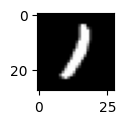

In [ ]:
plt.figure(figsize=(1, 1))
plt.imshow(digit_image, cmap = 'gray')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import random


In [ ]:
X = train.values
X_std = StandardScaler().fit_transform(X)


In [ ]:
def kmeans_clustering(X_std, k, max_iterations = 100):


  random_indices = random.sample(range(len(X_std)), k)
  centroids = X_std[random_indices]

  for iteration in range(max_iterations):
    similarities = np.dot(X_std, centroids.T)
    norms = np.linalg.norm(X_std, axis = 1)[:, np.newaxis]
    norms_centroids = np.linalg.norm(centroids, axis = 1)
    cosine_distances = 1 - similarities / (norms * norms_centroids)
    cluster_assignments = np.argmin(cosine_distances, axis = 1)

    new_centroids = np.array([X_std[cluster_assignments == i].mean(axis =0) for i in range(k)])

    if np.all(centroids == new_centroids):
      print(f"converged after {iteration + 1 } iterations")
      break
    centroids = new_centroids
  return cluster_assignments, centroids

def visualize_cluster(cluster_assignments,centroids,X_std,k):
  fig, axs = plt.subplots(k, 6, figsize=(12, 2 * k))

  for i in range(k):
    cluster_indices = np.where(cluster_assignments == i)[0]

    random_indices = random.sample(list(cluster_indices), min(5, len(cluster_indices)))

    centroid_image = centroids[i].reshape(28, 28)
    axs[i, 0].imshow(centroid_image, cmap='copper')
    axs[i, 0].set_title(f'Cluster {i} Centroid')
    axs[i, 0].axis('off')

    for j, idx in enumerate(random_indices):
        image = X_std[idx].reshape(28, 28)
        axs[i, j + 1].imshow(image, cmap='copper')
        axs[i, j + 1].set_title(f'Image {j + 1}')
        axs[i, j + 1].axis('off')

  plt.tight_layout()
  plt.show()

for 4th cluster
converged after 72 iterations


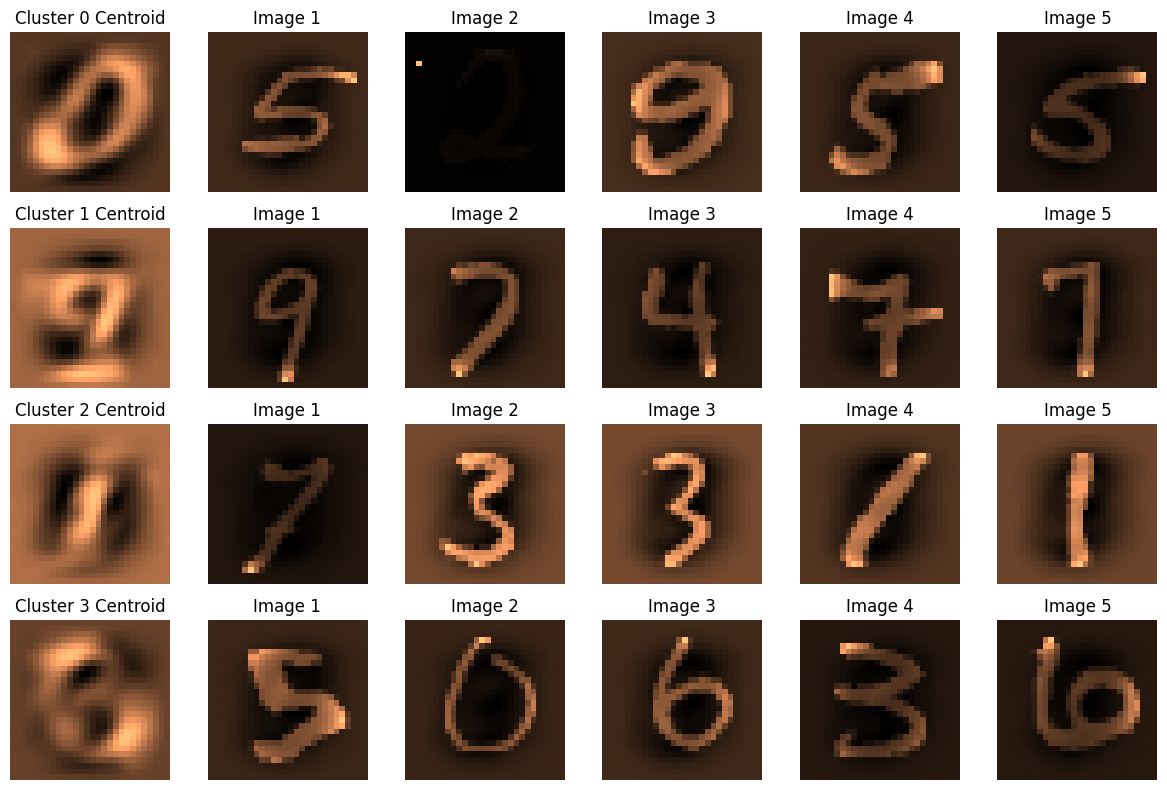

for 7th cluster
converged after 67 iterations


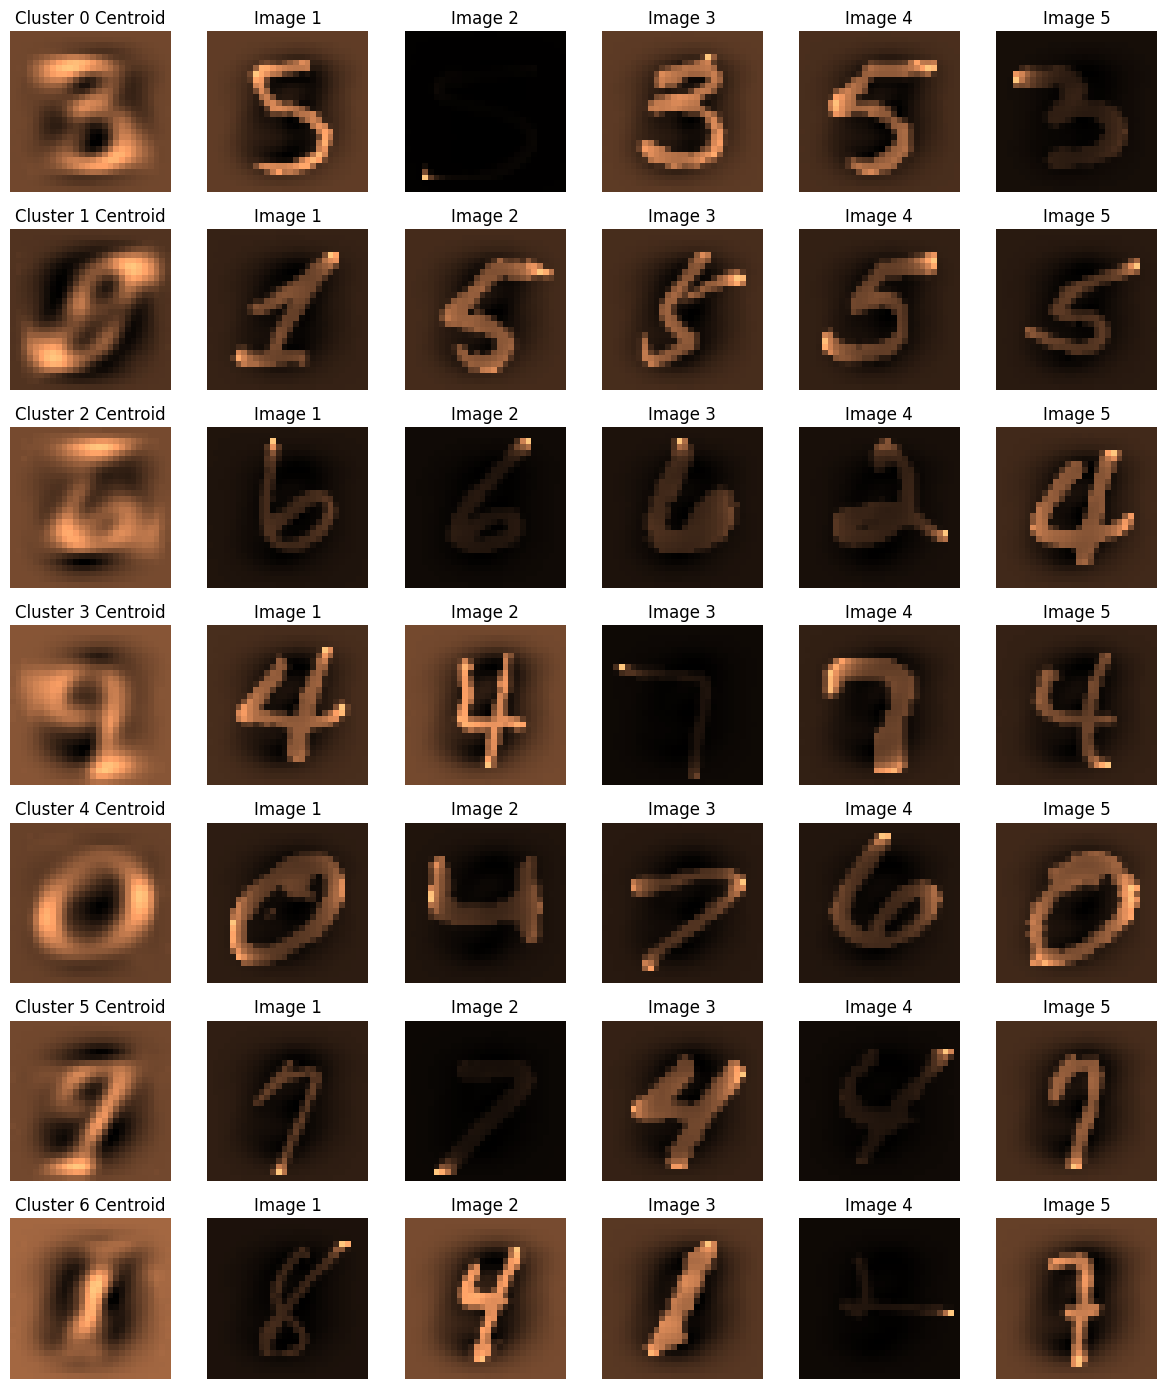

for 10th cluster
converged after 90 iterations


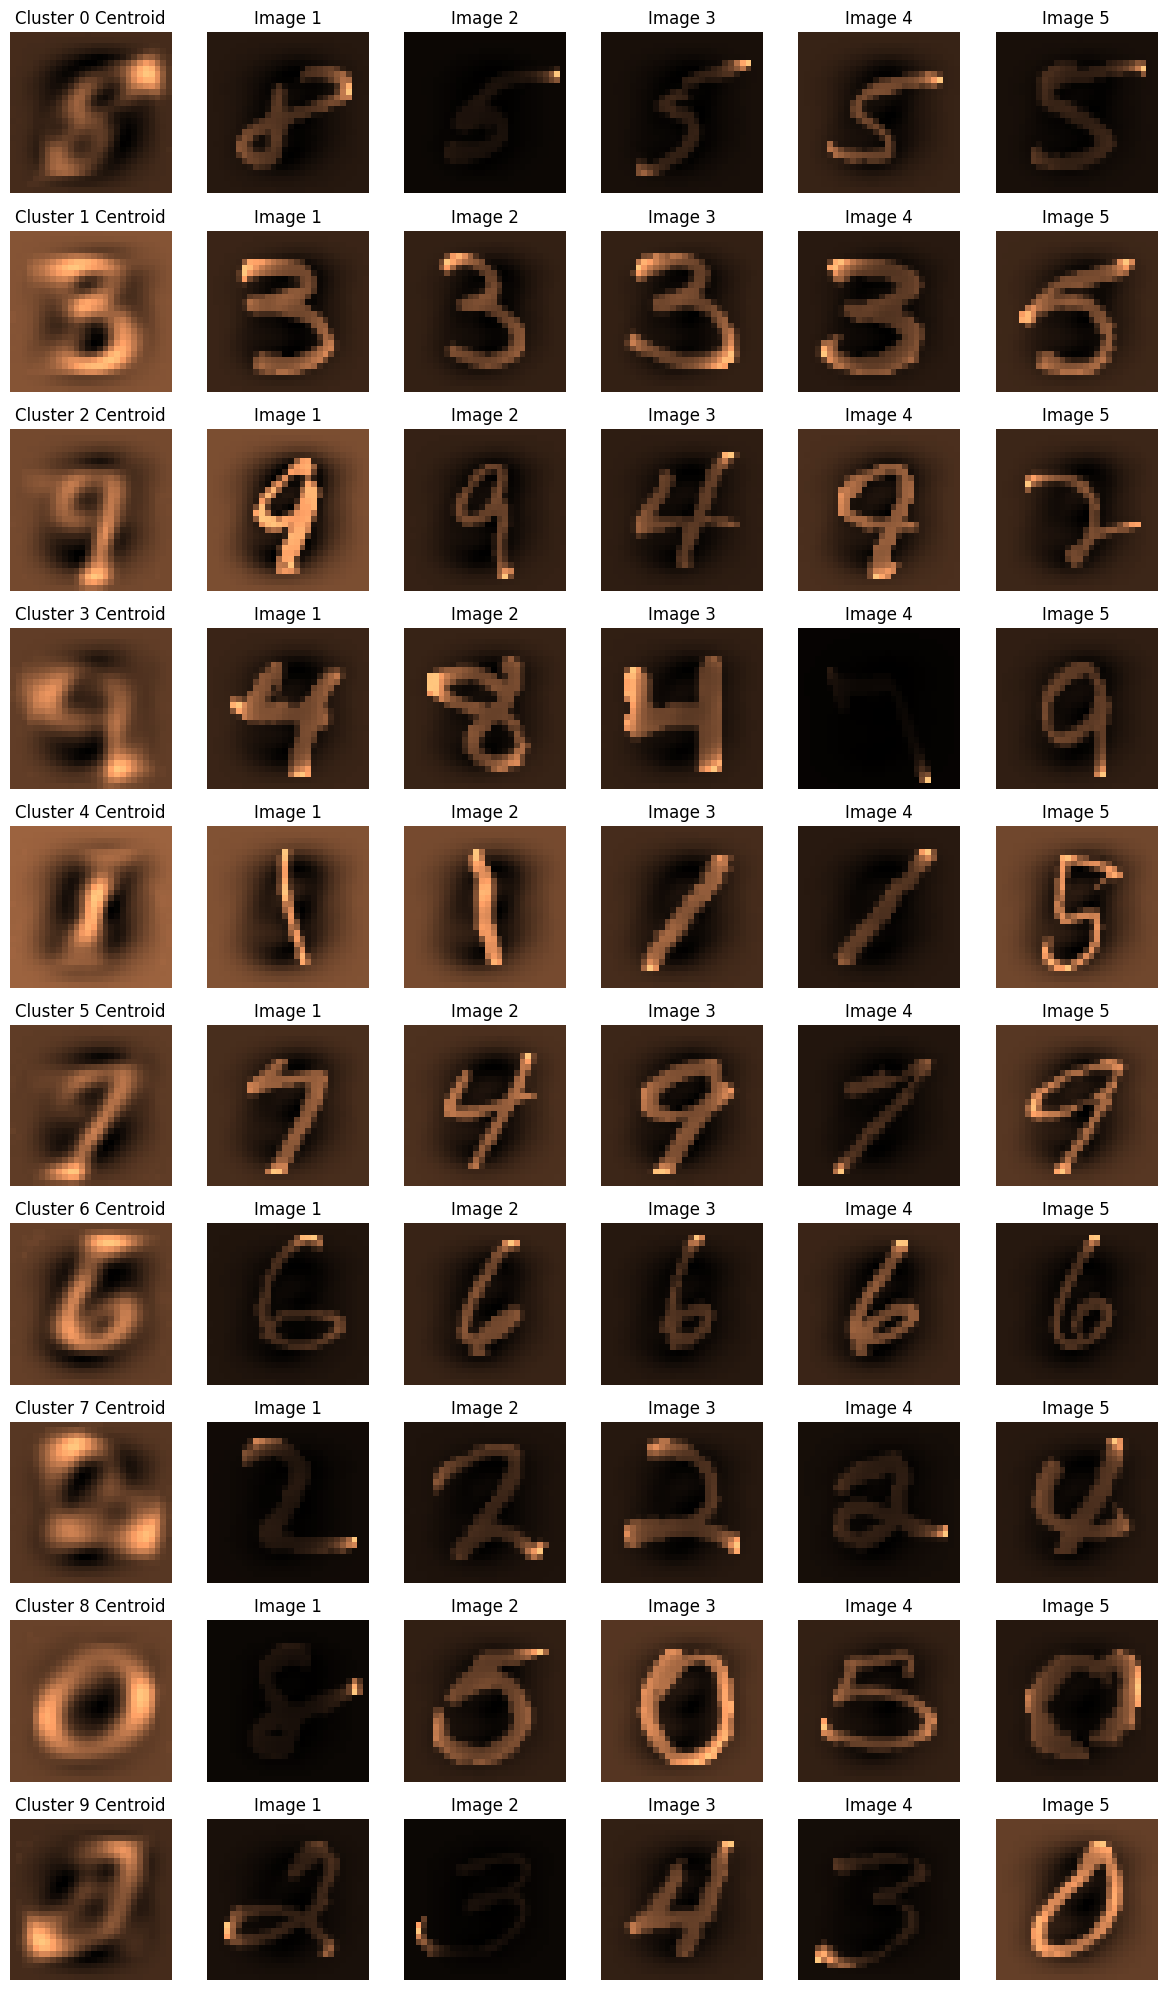

In [ ]:
num_clusters_list = [4, 7, 10]
for k in num_clusters_list:
  print(f"for {k}th cluster")
  cluster_assignments, centroids = kmeans_clustering(X_std, k)
  visualize_cluster(cluster_assignments, centroids, X_std, k)

# Elbow Method

In [ ]:
def calculate_average_dissimilarity(X_std, k):
    cluster_assignments, centroids = kmeans_clustering(X_std, k)
    similarities = np.dot(X_std, centroids.T)
    norms = np.linalg.norm(X_std, axis=1)[:, np.newaxis]
    norms_centroids = np.linalg.norm(centroids, axis=1)
    cosine_distances = 1 - similarities / (norms * norms_centroids)
    avg_dissimilarity = np.mean(np.min(cosine_distances, axis=1))
    return avg_dissimilarity

converged after 2 iterations
converged after 34 iterations
converged after 83 iterations
converged after 67 iterations
converged after 86 iterations
converged after 58 iterations
converged after 74 iterations
converged after 83 iterations
converged after 53 iterations
converged after 64 iterations


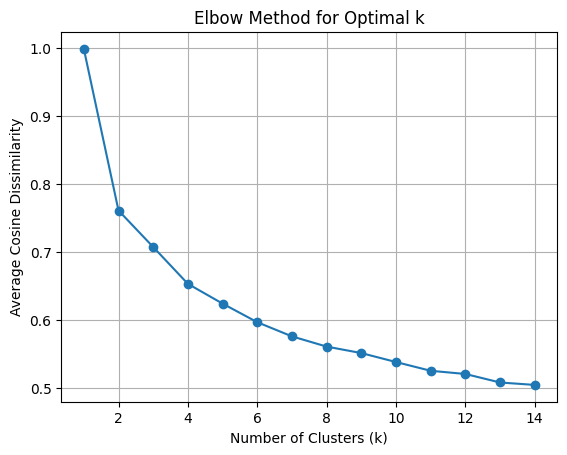

In [ ]:
avg_dissimilarities = []
k_s = range(1, 15)
threshold = 0.001

previous_dissimilarity = None

for k in k_s:
    avg_dissimilarity = calculate_average_dissimilarity(X_std, k)
    avg_dissimilarities.append(avg_dissimilarity)

    if previous_dissimilarity is not None:
        change = previous_dissimilarity - avg_dissimilarity

        if change < threshold:
            print(f"Stopping at k={k} as the change in dissimilarity is below the threshold.")
            break

    previous_dissimilarity = avg_dissimilarity

plt.plot(k_s[:len(avg_dissimilarities)], avg_dissimilarities, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Cosine Dissimilarity')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()